(29.99671173095703, 63.748023986816406)


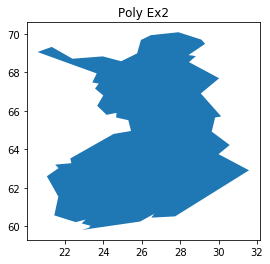

In [1]:
import geopandas as gpd
from shapely.geometry import Polygon

empty_var_to_be_replaced = None

# X -coordinates
xcoords = [29.99671173095703, 31.58196258544922, 27.738052368164062, 26.50013542175293, 26.652359008789062, 25.921663284301758, 22.90027618408203, 23.257217407226562,
           23.335693359375, 22.87444305419922, 23.08465003967285, 22.565473556518555, 21.452774047851562, 21.66388702392578, 21.065969467163086, 21.67659568786621,
           21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125, 25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
           24.174999237060547, 23.68471908569336, 24.000761032104492, 23.57332992553711, 23.76513671875, 23.430830001831055, 23.6597900390625, 20.580928802490234, 21.320831298828125,
           22.398330688476562, 23.97638702392578, 24.934917449951172, 25.7611083984375, 25.95930290222168, 26.476804733276367, 27.91069221496582, 29.1027774810791, 29.29846954345703,
           28.4355525970459, 28.817358016967773, 28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379, 29.818885803222656, 29.640830993652344, 30.57735824584961,
           29.99671173095703]

# Y -coordinates
ycoords = [63.748023986816406, 62.90789794921875, 60.511383056640625, 60.44499588012695, 60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
           60.02395248413086, 60.14555358886719, 60.3452033996582, 60.211936950683594, 60.56249237060547, 61.54027557373047, 62.59798049926758, 63.02013397216797,
           63.20353698730469, 63.27652359008789, 63.525691986083984, 64.79915618896484, 64.9533920288086, 65.51513671875, 65.65470886230469, 65.89610290527344, 65.79151916503906,
           66.26332092285156, 66.80228424072266, 67.1570053100586, 67.4168701171875, 67.47978210449219, 67.94589233398438, 69.060302734375, 69.32611083984375, 68.71110534667969,
           68.83248901367188, 68.580810546875, 68.98916625976562, 69.68568420410156, 69.9363784790039, 70.08860778808594, 69.70597076416016, 69.48533630371094, 68.90263366699219,
           68.84700012207031, 68.53485107421875, 67.69471740722656, 66.90360260009766, 65.70887756347656, 65.6533203125, 64.92096710205078, 64.22373962402344, 63.748023986816406]

# P1. Create a list of x and y coordinate pairs out of xcoords and ycoords
# ------------------------------------------------------------------------
# Coordinate pair can be either a tuple or a list.
# The first coordinate pair in the 'coordpairs' -list should look like: (29.99671173095703, 63.748023986816406)
# Hint: you might want to iterate over items in the lists using a loop

if not len(xcoords) == len(ycoords):
    print("Error, coordinate arrays don't have same length")

coordpairs = []
i=0
while i < len(xcoords):
    coordpairs.append((xcoords[i], ycoords[i]))
    i = i+1

print(coordpairs[0])

# -------------

zipped = zip(xcoords, ycoords)
coordpairs_2 = list(zipped)

# -------------

dfp = pd.DataFrame({'xcoords': xcoords, 'ycoords': ycoords})

def make_pair(row):
    return (row['xcoords'], row['ycoords'])

dfp['coord_pairs'] = dfp.apply(make_pair, axis=1)
coordpairs_3 = dfp['coord_pairs'].tolist()

# P2. Create a shapely Polygon using the 'coordpairs' -list
# ------------------------------------------------------------------------
poly = Polygon(coordpairs)

# P3. Create an empty GeoDataFrame
# ---------------------------------
geo = gpd.GeoDataFrame()

# P4. Insert our 'poly' -polygon into the 'geo' GeoDataFrame using a column name 'geometry'
# ------------------------------------------------------------------------------------------
# Hint: Take advantage of .loc -function
geo.loc[0, 'geometry'] = poly

# P5. Save the GeoDataFrame into a new Shapefile called 'polygon.shp'
# --------------------------------------------------------------------
# Note: you do not need to define the coordinate reference system at this time
out_fp = r"Data\polygon.shp"

# Save to disk
geo.to_file(out_fp)

# P6. Plot the polygon using taking advantage of the .plot() -function in GeoDataFrame. Save a PNG figure out of your plot and upload it to your GitHub repository.
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt

%matplotlib inline

geo.plot()
plt.title("Poly Ex2");
plt.savefig(r"Data\polygon.png")




In [2]:
import pandas as pd
df = pd.read_csv(r"Data\some_posts.csv", sep=',', encoding='latin1')
pd.set_option('max_columns',20)
display(df.head(5))

,lat,lon,timestamp,userid
0,-24.980792,31.484633,2015-07-07 03:02,66487960
1,-25.499225,31.508906,2015-07-07 03:18,65281761
2,-24.342578,30.930866,2015-03-07 03:38,90916112
3,-24.854614,31.519718,2015-10-07 05:04,37959089
4,-24.921069,31.520836,2015-10-07 05:19,27793716


In [3]:
from shapely.geometry import Point, Polygon

df['geometry'] = None

def make_point_fast(row):
    return Point(row['lon'], row['lat'])

# for index, row in df.iterrows():
#    df.loc[index, 'geometry'] = Point(row['lon'], row['lat'])

df['geometry'] = df.apply(make_point_fast, axis=1)

display(df.head(5))

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.484633302 -24.980792492)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.508905612 -25.499224667)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.930866066 -24.342578456)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.519718439 -24.85461393)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.520835558 -24.921068894)


In [4]:
import geopandas as gpd
from fiona.crs import from_epsg

# Convert DataFrame into a GeoDataFrame (providing the "geomtry" column from the pandas dataframe explicitly for GeoPandas dataframe as the geometry per feature)
geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs=from_epsg(4326))
display(geo_df.head(5))

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.484633302 -24.980792492)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.508905612 -25.499224667)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.930866066 -24.342578456)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.519718439 -24.85461393)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.520835558 -24.921068894)


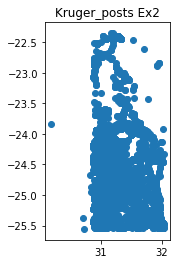

In [5]:
out_fp = r"Data\Kruger_posts.shp"

# Save to disk
geo_df.to_file(out_fp)

# P6. Plot the polygon using taking advantage of the .plot() -function in GeoDataFrame. Save a PNG figure out of your plot and upload it to your GitHub repository.
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt

%matplotlib inline

geo_df.plot()
plt.title("Kruger_posts Ex2");
plt.savefig(r"Data\Kruger_posts.png")

In [6]:
# Reproject the data from WGS84 into EPSG:32735
geo_df_proj = geo_df.to_crs(epsg=32735)
display(geo_df_proj.head(5))

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (952912.8896402244 7229683.258034403)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (953433.2225370432 7172080.632318303)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (898955.1435533497 7302197.408382947)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (956927.2183884098 7243564.942400582)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (956794.9549338031 7236187.925520503)


In [20]:
from shapely.geometry import LineString, Point

def createLineGeom(points_list):
    # Function should first check that the input list really contains Shapely Point(s)
    checked_points = []
    for p in points_list:
        if isinstance(p, Point):
            checked_points.append(p)
        else:
            pass
            # print("point {} is not a Point object".format(str(p)))
            # there are more sophisticated ways to check that, and make the program safer to bad input -> later
    # takes a list of Shapely Point objects as parameter and returns a LineString object of those input points
    if len(checked_points) >= 2:
        new_line = LineString(checked_points)
        return new_line
    else:
        # print("not enough points in input list t ocreate line")
        return None


grouped = geo_df_proj.groupby('userid')

# Create an empty GeoDataFrame called movements
movements = gpd.GeoDataFrame()
movements['userid'] = None
movements['geometry'] = None

# Set the CRS of the movements GeoDataFrame to EPSG:32735 (epsg code: 32735)
from fiona.crs import from_epsg

movements.crs = from_epsg(32735)

display(movements)

new_rows = []

# for each user ...
for key, values in grouped:
    # sort the rows by timestamp
    individual_user = values.sort_values(by=['timestamp'])
    
    # print(key)
    # display(individual_user)
    
    # create LineString objects based on the points
    point_list = []
    for index, row in individual_user.iterrows():
        tmp_point = row['geometry']
        point_list.append(tmp_point)
    
    user_line = createLineGeom(point_list)
    
    # add the geometry and the userid into the GeoDataFrame you created in the last step
    if not user_line is None:
        # print(user_line)
        # newdata.loc[index_counter, 'geometry'] = user_line
        # newdata.loc[index_counter, 'userid'] = key
        new_rows.append([key, user_line])
    
    # break

# version 1
# for idx in range(0, len(new_rows)):
#     movements = movements.append({'userid': new_rows[idx][0], 'geometry': new_rows[idx][1]}, ignore_index=True)

# version 2
temp_df = pd.DataFrame(new_rows, columns=['userid','geometry'])
display(temp_df.head(5))

newdata = movements.append(temp_df, sort=False)
display(newdata.head(5))

,userid,geometry


,userid,geometry
0,16301,LINESTRING (942231.6303657251 7254606.86776091...
1,45136,LINESTRING (905394.5001520057 7193375.14848753...
2,50136,LINESTRING (944551.6068488198 7253384.18283521...
3,88775,LINESTRING (902800.8165515774 7192546.97504934...
4,88918,LINESTRING (959332.9607456124 7219877.71476312...


,userid,geometry
0,16301,LINESTRING (942231.6303657251 7254606.86776091...
1,45136,LINESTRING (905394.5001520057 7193375.14848753...
2,50136,LINESTRING (944551.6068488198 7253384.18283521...
3,88775,LINESTRING (902800.8165515774 7192546.97504934...
4,88918,LINESTRING (959332.9607456124 7219877.71476312...


,userid,geometry,lengths
0,16301,LINESTRING (942231.6303657251 7254606.86776091...,328455.115430
1,45136,LINESTRING (905394.5001520057 7193375.14848753...,0.000000
2,50136,LINESTRING (944551.6068488198 7253384.18283521...,159189.081019
3,88775,LINESTRING (902800.8165515774 7192546.97504934...,0.080245
4,88918,LINESTRING (959332.9607456124 7219877.71476312...,9277.252211


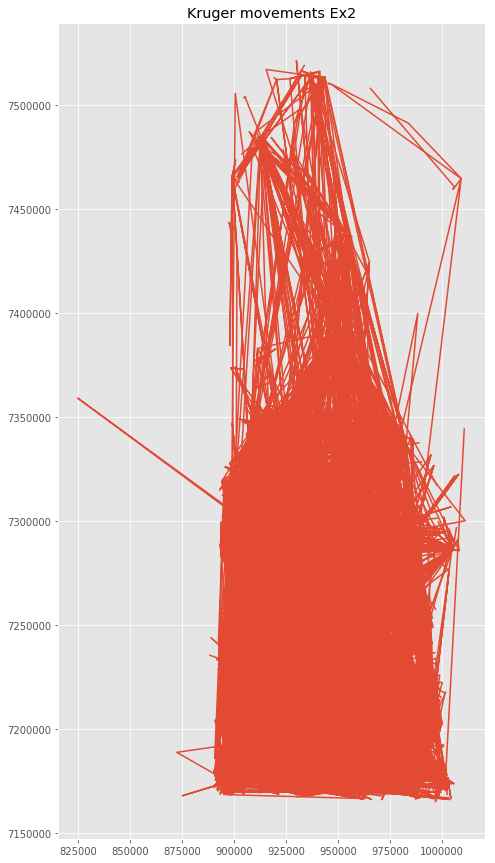

In [22]:
# Calculate the lenghts of the lines into a new column called distance in movements GeoDataFrame.
def calc_all_lengths(row):
    line = row['geometry']
    return line.length

newdata['lengths'] = newdata.apply(calc_all_lengths, axis=1)

display(newdata.head(5))

# Save the movements of into a Shapefile called Some_movements.shp
out_file = r"Data\Some_movements.shp"
newdata.to_file(out_file)

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

newdata.plot()
plt.title("Kruger movements Ex2");
plt.savefig(r"Data\Kruger_movements_posts.png")



In [24]:
# Questions
# Write your answers below the solved problems in your code file. You should also print the answers to the questions in your code.

# What was the shortest distance travelled in meters?
print(newdata['lengths'].min())

# What was the mean distance travelled in meters?
print(newdata['lengths'].mean())

# What was the maximum distance travelled in meters?
print(newdata['lengths'].max())


0.0
107133.5120294439
6970668.816343959


,A,B
0,1,2
1,3,4
